<a href="https://colab.research.google.com/github/Reachraksh/RAKSHA/blob/main/RESTAURANT%20SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Balaji Fast Food Sales.csv')

# Display first few rows
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Rename for clarity
df.rename(columns={
    'item_type': 'Category',
    'item_name': 'Item',
    'transaction_amount': 'Amount',
    'transaction_type': 'PaymentMode',
    'quantity': 'Quantity',
    'order_id': 'OrderID'
}, inplace=True)

# Filter only Beverages and Fastfood
df_filtered = df[df['Category'].isin(['Beverages', 'Fastfood'])]

# Set seaborn style
sns.set(style="whitegrid")

/tmp/ipython-input-2633960583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Category', y='Amount', palette='coolwarm')


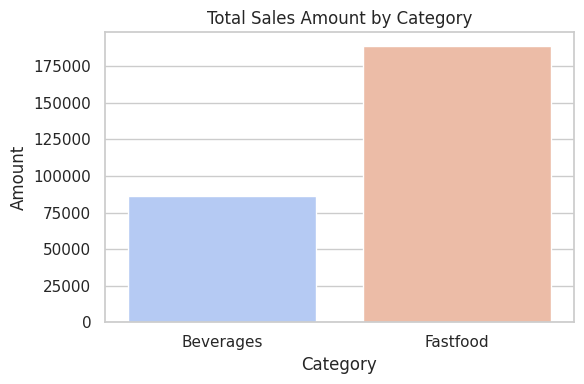

In [ ]:
# 1. Total Sales Amount by Category
sales_by_category = df_filtered.groupby('Category')['Amount'].sum().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=sales_by_category, x='Category', y='Amount', palette='coolwarm')
plt.title('Total Sales Amount by Category')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3191060925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantity_by_category, x='Category', y='Quantity', palette='coolwarm')


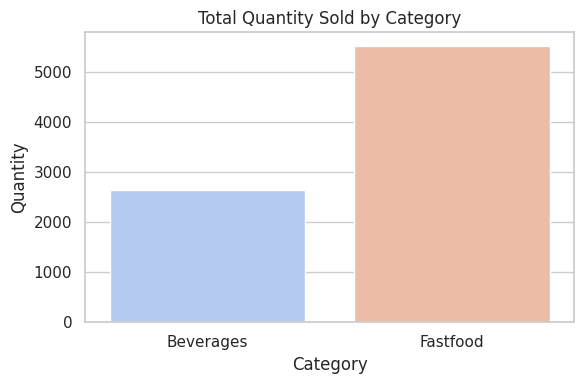

In [ ]:
# 2. Total Quantity Sold by Category
quantity_by_category = df_filtered.groupby('Category')['Quantity'].sum().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=quantity_by_category, x='Category', y='Quantity', palette='coolwarm')
plt.title('Total Quantity Sold by Category')
plt.tight_layout()
plt.show()

In [ ]:
df['Profit'] = df['Amount'] * 0.30  # assumed margin

# 1. Total Sales and Profit

total_sales = df['Amount'].sum()
total_profit = df['Profit'].sum()
print("Total Sales: ₹", total_sales)
print("Total Profit (estimated): ₹", total_profit)

Total Sales: ₹ 275230
Total Profit (estimated): ₹ 82569.0


/tmp/ipython-input-3967986299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=totals, x='Metric', y='Amount', palette='Set2')


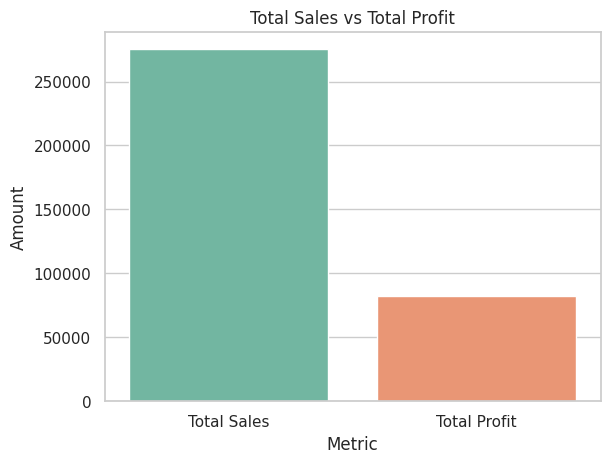

In [ ]:
# 1. Total Sales and Profit (Bar Chart)
totals = pd.DataFrame({'Metric': ['Total Sales', 'Total Profit'],
                       'Amount': [df['Amount'].sum(), df['Profit'].sum()]})
sns.barplot(data=totals, x='Metric', y='Amount', palette='Set2')
plt.title('Total Sales vs Total Profit')
plt.show()

/tmp/ipython-input-1994959837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_category, x='Category', y='Count', palette='viridis')


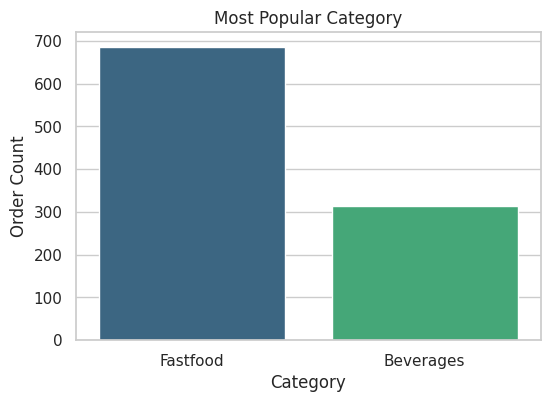

In [ ]:
popular_category = df['Category'].value_counts().reset_index()
popular_category.columns = ['Category', 'Count']
plt.figure(figsize=(6, 4))
sns.barplot(data=popular_category, x='Category', y='Count', palette='viridis')
plt.title('Most Popular Category')
plt.xlabel('Category')
plt.ylabel('Order Count')
plt.show()

Total Sales: ₹275230
Total Profit: ₹82569.0


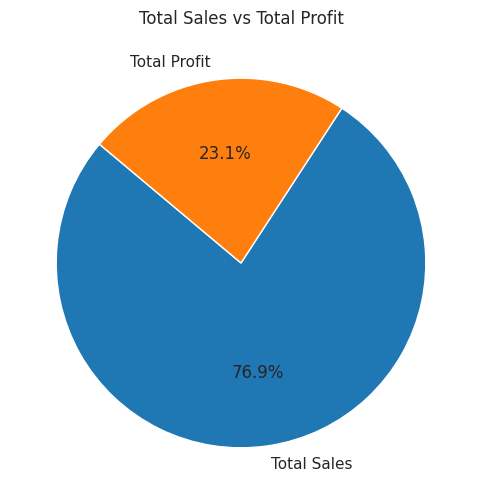

In [ ]:
# Calculate total sales and total profit
total_sales = df['Amount'].sum()
total_profit = df['Profit'].sum()

# Print results
print(f"Total Sales: ₹{total_sales}")
print(f"Total Profit: ₹{total_profit}")

# Pie Chart
labels = ['Total Sales', 'Total Profit']
values = [total_sales, total_profit]
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Total Sales vs Total Profit")
plt.show()





Payment Mode Usage:
 PaymentMode
Cash      476
Online    417
Name: count, dtype: int64


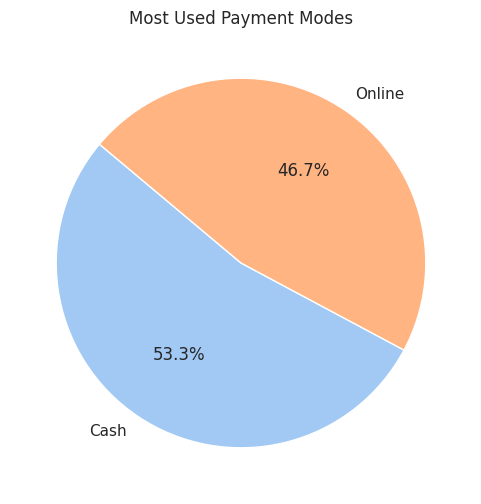

In [ ]:
payment_counts = df['PaymentMode'].value_counts()

print("Payment Mode Usage:\n", payment_counts)

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Most Used Payment Modes")
plt.show()
